##    Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
data=pd.read_excel("real_estate.xlsx")

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
data.isna().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [6]:
data["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

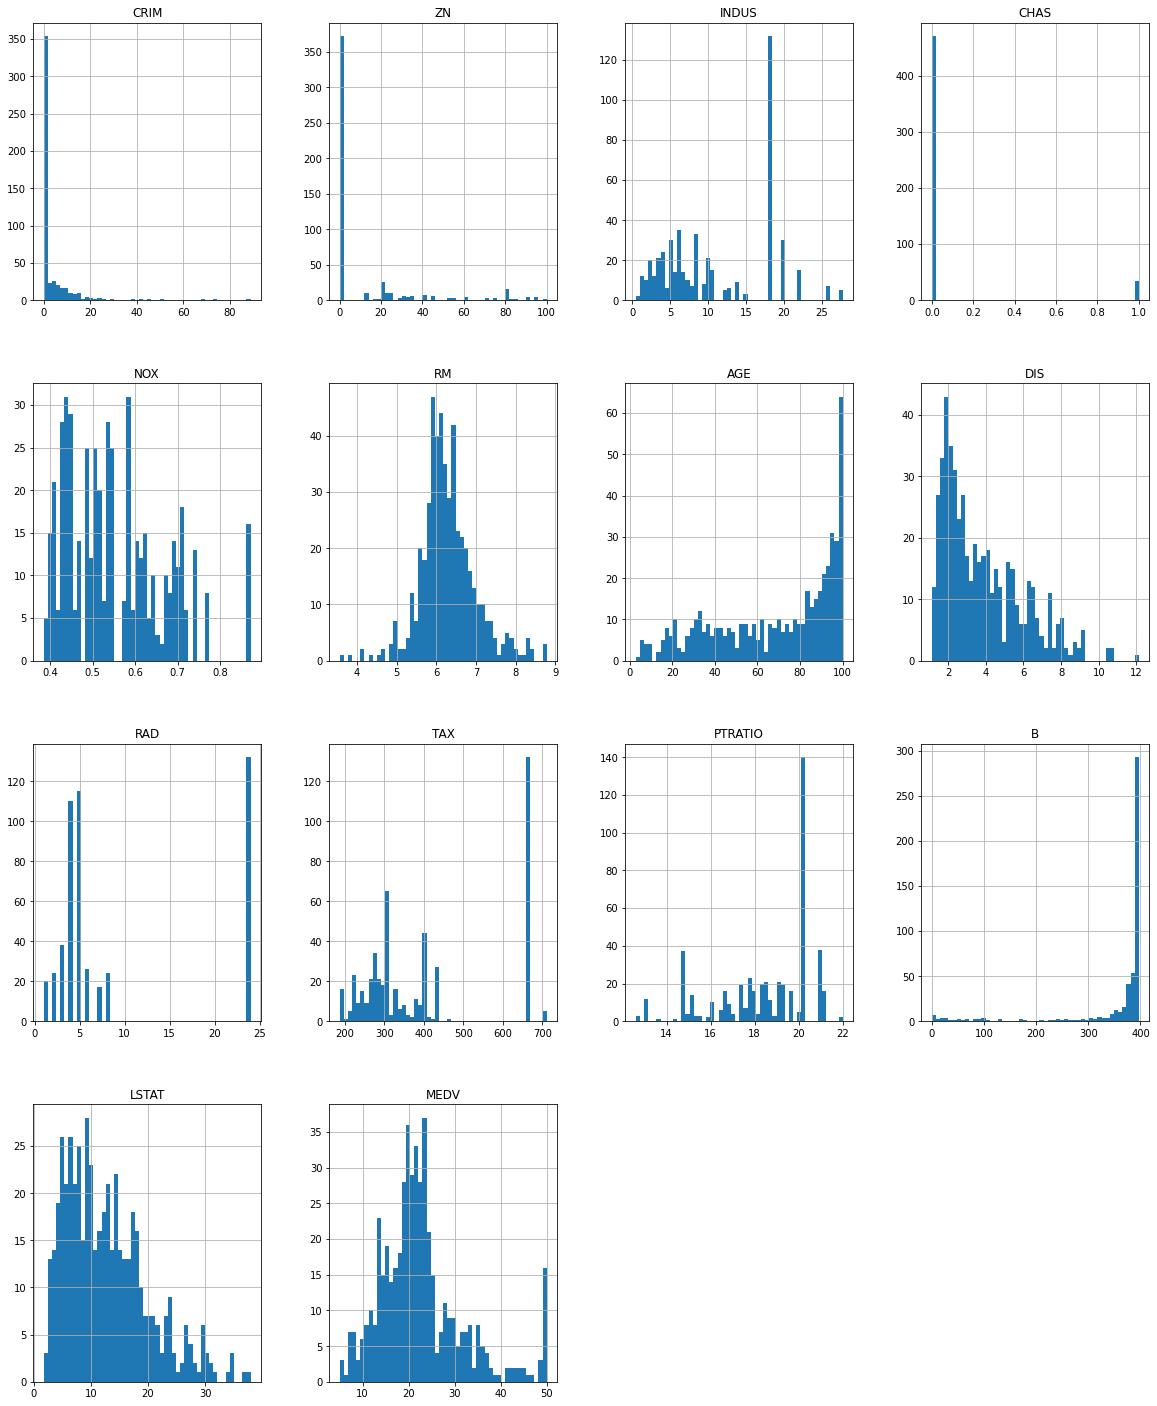

In [9]:
data.hist(bins=50, figsize=(20,25))
plt.show()

## Correlation Checking

In [10]:
corr_matrix=data.corr()

In [11]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [12]:
attributes=["MEDV","RM","ZN","LSTAT","PTRATIO"]

In [13]:
import seaborn as sns

<AxesSubplot:>

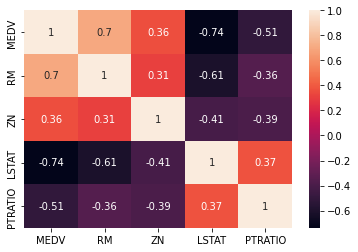

In [14]:
corr=data[attributes].corr()
sns.heatmap(corr,annot=True)

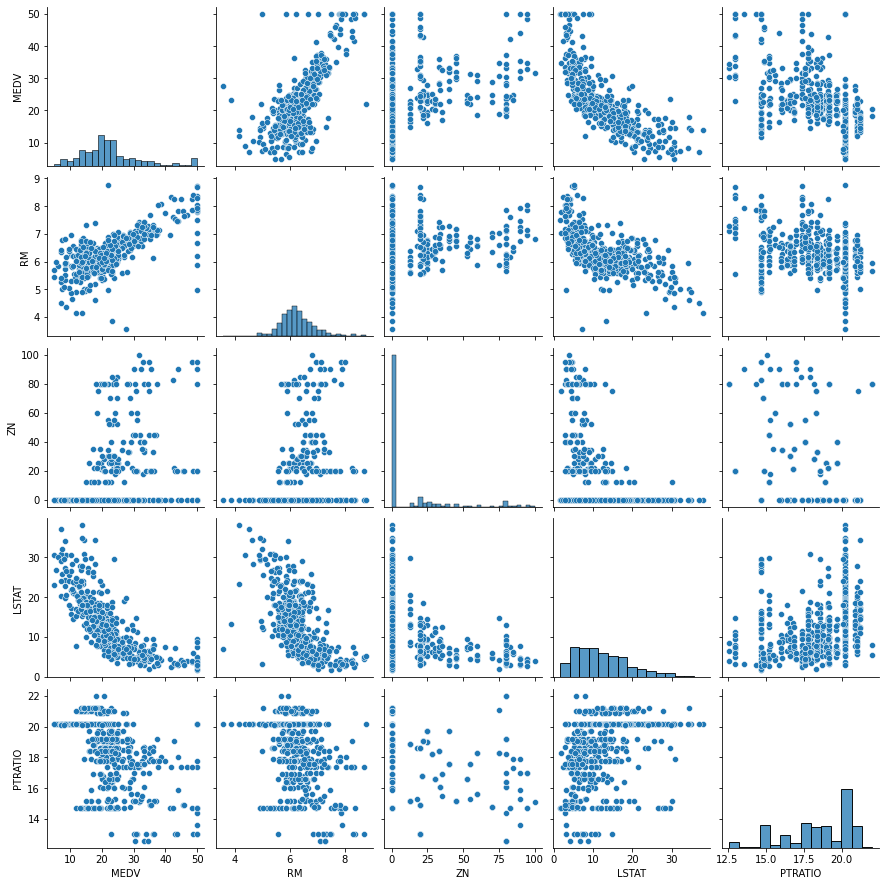

In [15]:
sns.pairplot(data[attributes])

## Creating pipeline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ("std_scaler" , StandardScaler()),
])

## Selecting a desired model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [18]:
feature=data.drop("MEDV",axis=1)
std_feature=my_pipeline.fit_transform(feature)
label=data["MEDV"]

In [19]:
mse_by_LR = cross_val_score(LinearRegression(),std_feature,label,scoring="neg_mean_squared_error",cv=10)
mse_by_DTR = cross_val_score(DecisionTreeRegressor(),std_feature,label,scoring="neg_mean_squared_error",cv=10)
mse_by_RFR = cross_val_score(RandomForestRegressor(n_estimators=40),std_feature,label,scoring="neg_mean_squared_error",cv=10)

In [20]:
rmse_LR=np.sqrt(-mse_by_LR)
rmse_DTR = np.sqrt(-mse_by_DTR)
rmse_RFR = np.sqrt(-mse_by_RFR)

In [21]:
score=[]
score.append({"model" : "LinearRegression", "rmse" : (rmse_LR).mean() , "std_deviation" : (rmse_LR).std()})
score.append({"model" : "DecisionTree", "rmse" : (rmse_DTR).mean() , "std_deviation" : (rmse_DTR).std()})
score.append({"model" : "RandomForest", "rmse" : (rmse_RFR).mean() , "std_deviation" : (rmse_RFR).std()})

In [22]:
df=pd.DataFrame(score)

In [23]:
df

,model,rmse,std_deviation
0,LinearRegression,5.180846,2.804299
1,DecisionTree,6.070277,2.347209
2,RandomForest,4.253437,2.167149


## Output : Random Forest Regression is working better among these

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=42)

In [25]:
for train_index,test_index in split.split(data,data["CHAS"]):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [26]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455 entries, 59 to 466
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     455 non-null    float64
 1   ZN       455 non-null    float64
 2   INDUS    455 non-null    float64
 3   CHAS     455 non-null    int64  
 4   NOX      455 non-null    float64
 5   RM       455 non-null    float64
 6   AGE      455 non-null    float64
 7   DIS      455 non-null    float64
 8   RAD      455 non-null    int64  
 9   TAX      455 non-null    int64  
 10  PTRATIO  455 non-null    float64
 11  B        455 non-null    float64
 12  LSTAT    455 non-null    float64
 13  MEDV     455 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 53.3 KB


In [27]:
strat_train_set["CHAS"].value_counts() , strat_test_set["CHAS"].value_counts()

(0    424
 1     31
 Name: CHAS, dtype: int64,
 0    47
 1     4
 Name: CHAS, dtype: int64)

In [28]:
x_train=strat_train_set.drop("MEDV",axis=1)
y_train=strat_train_set["MEDV"]
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"]

In [29]:
model=RandomForestRegressor(n_estimators=40)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40)

In [30]:
model.score(x_test,y_test)

0.885558133477506

## Score = 0.8818603648755075

In [31]:
model.predict(x_test)

array([11.41  , 31.855 , 14.53  , 14.32  , 23.64  , 14.745 , 19.8175,
       15.88  , 18.4875, 47.4725, 33.6675, 10.935 , 33.1325, 19.8125,
       20.0725, 18.265 , 29.055 , 20.5825, 32.9475, 45.7625, 42.49  ,
       21.5525, 29.8275, 21.005 , 20.055 , 23.4675, 19.13  , 22.5125,
       14.18  , 19.97  , 18.7425, 21.3125, 19.5725, 11.555 , 23.0875,
       20.7275, 21.105 , 19.01  , 18.9925, 21.3525, 25.84  , 14.7375,
       33.055 ,  6.9875, 20.0525, 24.3675, 20.1925, 21.21  ,  9.6675,
       30.515 , 21.4525])

In [32]:
y_test

378    13.1
275    32.0
420    16.7
20     13.6
360    25.0
356    17.8
130    19.2
153    19.4
21     19.6
195    50.0
196    33.3
394    12.7
198    34.6
493    21.8
340    18.7
106    19.5
194    29.1
335    21.1
99     33.2
232    41.7
273    35.2
87     22.2
263    31.0
505    11.9
150    21.5
320    23.8
102    18.6
176    23.2
448    14.1
167    23.8
470    19.9
121    20.3
54     18.9
379    10.2
58     23.3
255    20.9
218    21.5
346    17.2
48     14.4
71     21.7
407    27.9
478    14.6
303    33.1
398     5.0
357    21.7
181    36.2
50     19.7
297    20.3
383    12.3
284    32.2
502    20.6
Name: MEDV, dtype: float64

## saving the model

In [33]:
from joblib import dump,load
dump(model,"Real_state_price_pridictor.joblib")

['Real_state_price_pridictor.joblib']